# Self - Attention

query - o que estou procurando
key - o que tenho a oferecer
value - o que eu realmente ofereço

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Exemplo de tradução
# Frase de entrada (inglês)
input_sentence = "Eu estou muito feliz"
# Frase traduzida (português)
output_sentence =  "I am very happy"

In [3]:
L, d_k, d_v = 4, 8, 8

In [4]:
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [5]:
q.var(), k.var(), np.matmul(q, k.T).var()

(0.8269643974995575, 1.1732479634942026, 8.785315747450271)

In [6]:
scaled = np.matmul(q,k.T) / math.sqrt(d_k)
scaled.var()

1.0981644684312837

In [7]:
mask = np.tril(np.ones((L,L)))

mask[mask==0] = -np.infty
mask[mask==1] = 0

mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [8]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.shape[-1]
    scaled = np.matmul(q, k.T) / math.sqrt(d_k)
    if mask is not None:
        scaled = scaled + mask
    attention = softmax(scaled)
    out = np.matmul(attention, v)
    return out, attention

In [9]:
def plot_attention_heatmap(attention_matrix, input_sentence, output_sentence):
    plt.figure(figsize=(8, 6))
    plt.imshow(attention_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.xticks(np.arange(len(output_sentence)), output_sentence)
    plt.yticks(np.arange(len(input_sentence)), input_sentence)
    plt.xlabel('Output')
    plt.ylabel('Input')
    plt.title('Attention Heatmap')
    plt.show()

In [16]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[-0.02995327  0.36189566 -1.36995412 -0.20848911  0.79096271 -0.6687335
   0.91633208 -0.53181607]
 [-0.03984006  0.116389    0.12780866  2.1374876   1.16484833  0.02194324
  -0.94756961 -2.17562791]
 [-0.07006813 -0.23997978 -1.04361879 -1.56656369  0.48085846  0.01376757
   1.77821963 -0.42694288]
 [ 0.39505043  0.99964974  0.90011933  0.48703786 -0.05907988 -0.72889438
   0.17544385 -0.82265977]]
K
 [[-1.43993887 -0.7590662   2.42428472  0.38108948  1.28813129  0.7318157
  -0.6434666   0.78972398]
 [ 1.12755049  0.12721643  0.63416685 -1.14503601  0.5788947   0.47156675
   0.84612166  0.16949014]
 [ 0.35617572 -0.8770593  -0.63270255 -0.67928996 -0.41902016  1.70262307
   0.53719636 -0.46319715]
 [-0.3555167   0.7339877  -0.88790682 -2.36694448  0.73834102 -1.61347572
   0.52978518 -2.35002751]]
V
 [[ 0.94918326 -1.38977784 -0.49198933  2.6928536   0.5891871  -0.74434075
  -0.45010956  0.15792216]
 [-0.619162   -1.32546473  0.31923359  0.49793278  1.14054303  1.19194968
  -2.627

In [10]:
new_v_input, attention_input = scaled_dot_product_attention(q, k, v, mask=None)

In [11]:
new_v_output, attention_output = scaled_dot_product_attention(q, k, v, mask=mask)

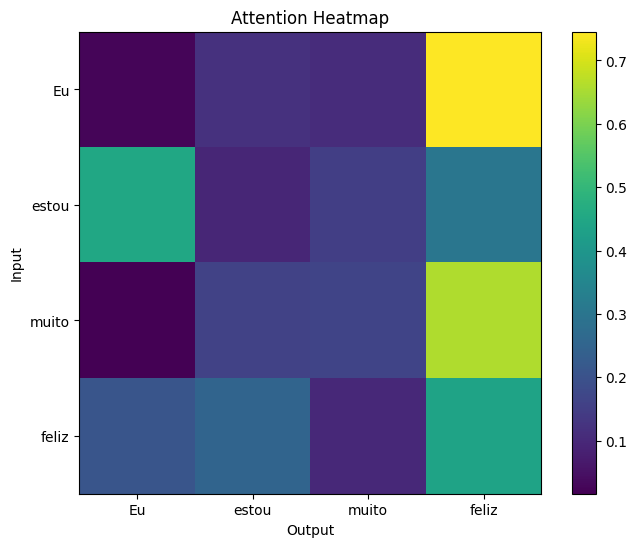

In [13]:
plot_attention_heatmap(attention_input.squeeze(), input_sentence.split(), input_sentence.split())

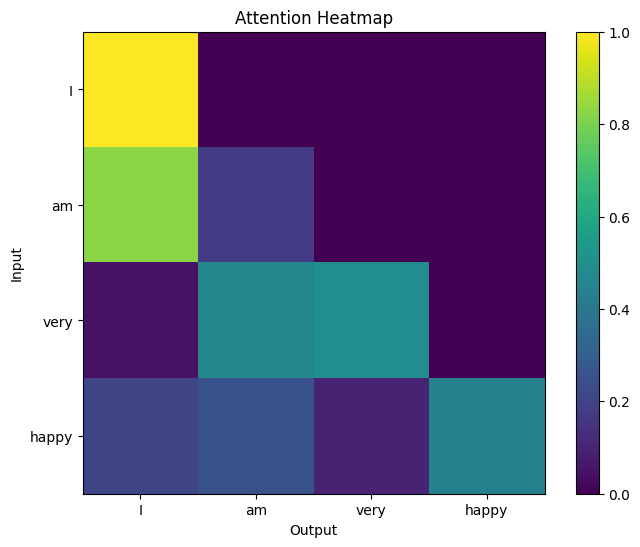

In [14]:
plot_attention_heatmap(attention_output.squeeze(), output_sentence.split(), output_sentence.split())

Referência:
- https://github.com/ajhalthor